In [19]:
import geopandas as gpd
import pandas as pd
from os import path, mkdir
import plotly.express as px
import mapboxgl as mbx
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [20]:
las_fn = path.join('zip://','initial_data','local_authorities.zip')
las = gpd.read_file(las_fn)
las.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [21]:
barnet = las[las.lad19nm=='Barnet']

In [22]:
new_barnet_loc = Point(-0.1693069, 51.6526383)
libs = gpd.read_file(path.join('initial_data','libraries.json'))
libs = libs[libs.library!='East Barnet Library']
libs.loc[len(libs.index)] = ['New Barnet Library', new_barnet_loc]
libs = libs.to_crs(27700)
libs

/Users/richardlynch/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,library,geometry
0,Hendon Library,POINT (522783.533 189236.852)
1,East Finchley Library,POINT (527024.713 189932.304)
2,Burnt Oak Library,POINT (520376.541 190802.064)
3,Chipping Barnet Library,POINT (524280.883 196779.310)
5,Edgware Library,POINT (519595.917 192240.191)
6,Golders Green Library,POINT (524712.598 187745.348)
7,Colindale Library,POINT (521649.288 190675.609)
8,Mill Hill Library,POINT (521744.328 192185.620)
9,North Finchley Library,POINT (526373.761 192663.337)
10,Osidge Library,POINT (528204.925 194017.850)


In [23]:
libs_radii = gpd.GeoDataFrame(libs, geometry=libs.buffer(1000))
libs_radii

,library,geometry
0,Hendon Library,"POLYGON ((523783.533 189236.852, 523778.718 18..."
1,East Finchley Library,"POLYGON ((528024.713 189932.304, 528019.898 18..."
2,Burnt Oak Library,"POLYGON ((521376.541 190802.064, 521371.726 19..."
3,Chipping Barnet Library,"POLYGON ((525280.883 196779.310, 525276.067 19..."
5,Edgware Library,"POLYGON ((520595.917 192240.191, 520591.102 19..."
6,Golders Green Library,"POLYGON ((525712.598 187745.348, 525707.783 18..."
7,Colindale Library,"POLYGON ((522649.288 190675.609, 522644.473 19..."
8,Mill Hill Library,"POLYGON ((522744.328 192185.620, 522739.513 19..."
9,North Finchley Library,"POLYGON ((527373.761 192663.337, 527368.946 19..."
10,Osidge Library,"POLYGON ((529204.925 194017.850, 529200.110 19..."


In [24]:
lsoas = gpd.read_file(path.join('zip://','initial_data', 'lsoas.zip'))

<AxesSubplot:>

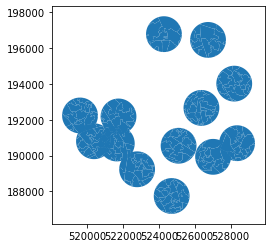

In [25]:
libs_lsoas = gpd.overlay(lsoas, libs, how='intersection')
libs_lsoas.plot()

In [26]:
# make the geometries full shapes again rather than clipped at the edge of the circle
libs_lsoas = libs_lsoas[['LSOA11CD','LSOA11NM','library']].merge(lsoas, how='left')[['LSOA11CD','LSOA11NM','library', 'geometry']]
libs_lsoas

,LSOA11CD,LSOA11NM,library,geometry
0,E01000115,Barnet 009A,Osidge Library,"POLYGON ((528816.368 194812.844, 528822.375 19..."
1,E01000116,Barnet 009B,Osidge Library,"POLYGON ((528290.550 194677.039, 528292.580 19..."
2,E01000117,Barnet 010A,Osidge Library,"POLYGON ((527869.109 194357.986, 527866.504 19..."
3,E01000118,Barnet 010B,Osidge Library,"POLYGON ((528104.534 194492.629, 528101.067 19..."
4,E01000119,Barnet 009C,Osidge Library,"POLYGON ((529253.398 194418.579, 529250.584 19..."
...,...,...,...,...
258,E01000288,Barnet 004C,Chipping Barnet Library,"POLYGON ((524987.174 196115.443, 525000.000 19..."
259,E01000292,Barnet 001E,Chipping Barnet Library,"POLYGON ((524571.652 196441.188, 524571.938 19..."
260,E01000293,Barnet 001F,Chipping Barnet Library,"POLYGON ((524761.391 196322.729, 524773.813 19..."
261,E01000294,Barnet 004F,Chipping Barnet Library,"POLYGON ((524144.398 196427.824, 524147.000 19..."


In [118]:
imd = pd.read_csv(path.join('initial_data', 'imd.csv'))
imd.rename({'LSOA code (2011)':'LSOA11CD', 'LSOA name (2011)':'LSOA11NM'}, axis=1, inplace=True)

In [119]:
imd = imd[[x for x in imd.columns if 'LSOA' in x or 'decile' in x.lower()]]
imd.columns = [x.replace(' Decile (where 1 is most deprived 10% of LSOAs)', '') for x in imd.columns]

In [120]:
# melt imd so it's long ways, and filter out any rows greater than 3
imd = pd.melt(imd, id_vars=imd.columns[:2], value_vars=imd.columns[2:]).query('value<3')

In [121]:
imd = imd[imd.LSOA11CD.isin(list(libs_lsoas.LSOA11CD.unique()))]
imd

,LSOA11CD,LSOA11NM,variable,value
117,E01000121,Barnet 010C,Index of Multiple Deprivation (IMD),2
122,E01000126,Barnet 026A,Index of Multiple Deprivation (IMD),2
146,E01000151,Barnet 026B,Index of Multiple Deprivation (IMD),2
148,E01000153,Barnet 026D,Index of Multiple Deprivation (IMD),2
216,E01000221,Barnet 039B,Index of Multiple Deprivation (IMD),1
...,...,...,...,...
494733,E01002123,Harrow 007E,Outdoors Sub-domain,2
494735,E01002125,Harrow 010B,Outdoors Sub-domain,2
515616,E01023584,Hertsmere 004D,Outdoors Sub-domain,1
525307,E01033572,Barnet 030E,Outdoors Sub-domain,2


In [125]:
variable_count = imd[['LSOA11CD','LSOA11NM','variable']].groupby(['LSOA11CD','LSOA11NM']).count().rename({'variable':'lsoa_count'}, axis=1)
variable_count

,,lsoa_count
LSOA11CD,LSOA11NM,
E01000115,Barnet 009A,1
E01000118,Barnet 010B,1
E01000119,Barnet 009C,1
E01000121,Barnet 010C,7
E01000122,Barnet 009E,1
...,...,...
E01002124,Harrow 010A,2
E01002125,Harrow 010B,3
E01023584,Hertsmere 004D,5


In [135]:
imd['record'] = imd[['variable','value']].to_dict(orient='records')
records = imd[['LSOA11CD','LSOA11NM','record']].groupby(['LSOA11CD','LSOA11NM']).sum().to_frame().rename({0:'record'}, axis=1).reset_index().drop('level_2', axis=1)
# new_imd = pd.concat([variable_count, records], axis=1)
# new_imd
# records

,LSOA11CD,LSOA11NM,record
0,E01000115,Barnet 009A,"{'variable': 'Outdoors Sub-domain', 'value': 2}"
1,E01000118,Barnet 010B,"{'variable': 'Wider Barriers Sub-domain', 'val..."
2,E01000119,Barnet 009C,"{'variable': 'Outdoors Sub-domain', 'value': 2}"
3,E01000122,Barnet 009E,{'variable': 'Barriers to Housing and Services...
4,E01000166,Barnet 003A,"{'variable': 'Wider Barriers Sub-domain', 'val..."
5,E01000169,Barnet 003C,"{'variable': 'Wider Barriers Sub-domain', 'val..."
6,E01000170,Barnet 006A,"{'variable': 'Wider Barriers Sub-domain', 'val..."
7,E01000174,Barnet 006D,"{'variable': 'Wider Barriers Sub-domain', 'val..."
8,E01000186,Barnet 014A,"{'variable': 'Outdoors Sub-domain', 'value': 2}"
9,E01000187,Barnet 014B,"{'variable': 'Wider Barriers Sub-domain', 'val..."


In [133]:
imd

,LSOA11CD,LSOA11NM,variable,value,record
117,E01000121,Barnet 010C,Index of Multiple Deprivation (IMD),2,{'variable': 'Index of Multiple Deprivation (I...
122,E01000126,Barnet 026A,Index of Multiple Deprivation (IMD),2,{'variable': 'Index of Multiple Deprivation (I...
146,E01000151,Barnet 026B,Index of Multiple Deprivation (IMD),2,{'variable': 'Index of Multiple Deprivation (I...
148,E01000153,Barnet 026D,Index of Multiple Deprivation (IMD),2,{'variable': 'Index of Multiple Deprivation (I...
216,E01000221,Barnet 039B,Index of Multiple Deprivation (IMD),1,{'variable': 'Index of Multiple Deprivation (I...
...,...,...,...,...,...
494733,E01002123,Harrow 007E,Outdoors Sub-domain,2,"{'variable': 'Outdoors Sub-domain', 'value': 2}"
494735,E01002125,Harrow 010B,Outdoors Sub-domain,2,"{'variable': 'Outdoors Sub-domain', 'value': 2}"
515616,E01023584,Hertsmere 004D,Outdoors Sub-domain,1,"{'variable': 'Outdoors Sub-domain', 'value': 1}"
525307,E01033572,Barnet 030E,Outdoors Sub-domain,2,"{'variable': 'Outdoors Sub-domain', 'value': 2}"


In [72]:
# final gdf, merge is inner
gdf = libs_lsoas.merge(imd)
gdf

,LSOA11CD,LSOA11NM,library,geometry,variable,value
0,E01000115,Barnet 009A,Osidge Library,"POLYGON ((528816.368 194812.844, 528822.375 19...",Outdoors Sub-domain,2
1,E01000118,Barnet 010B,Osidge Library,"POLYGON ((528104.534 194492.629, 528101.067 19...",Wider Barriers Sub-domain,2
2,E01000119,Barnet 009C,Osidge Library,"POLYGON ((529253.398 194418.579, 529250.584 19...",Outdoors Sub-domain,2
3,E01000121,Barnet 010C,Osidge Library,"POLYGON ((528398.405 193916.111, 528471.559 19...",Index of Multiple Deprivation (IMD),2
4,E01000121,Barnet 010C,Osidge Library,"POLYGON ((528398.405 193916.111, 528471.559 19...",Income,2
...,...,...,...,...,...,...
728,E01023584,Hertsmere 004D,Chipping Barnet Library,"POLYGON ((520172.406 205498.594, 520216.500 20...",Barriers to Housing and Services,1
729,E01023584,Hertsmere 004D,Chipping Barnet Library,"POLYGON ((520172.406 205498.594, 520216.500 20...",Living Environment,1
730,E01023584,Hertsmere 004D,Chipping Barnet Library,"POLYGON ((520172.406 205498.594, 520216.500 20...",Geographical Barriers Sub-domain,1
731,E01023584,Hertsmere 004D,Chipping Barnet Library,"POLYGON ((520172.406 205498.594, 520216.500 20...",Indoors Sub-domain,2
